- Import Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing

from sklearn import datasets, linear_model

import warnings
warnings.filterwarnings('ignore')

# Data Profiling

In [2]:
#Load Dataset
df = pd.read_csv('Housing.csv')

In [3]:
df.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


- it shown 'thatfurnishingstatus' is categorical data

In [4]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


- therefore data cleansing is no need to be performed on Housing.csv dataset 

# Exploratory Data Analysis

- Describing Data

In [6]:
df.describe()
# checking whether anomaly of datas are present

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


- The targeted is 'Price' feature or as y

Next checking relation between Price and another feature (we choose area and bedrooms)

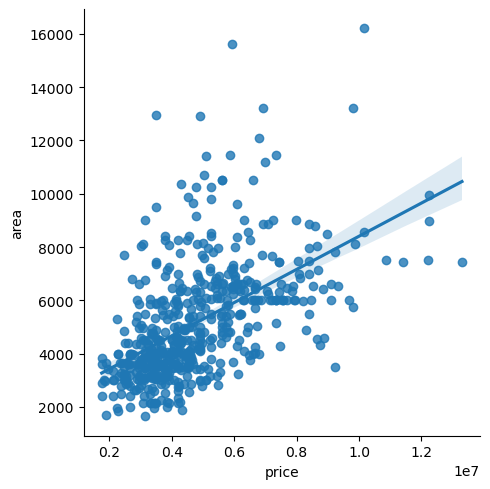

In [7]:
# Price VS Area
sns.lmplot(x='price',y='area',data=df,palette='gnuplot2',size=5)

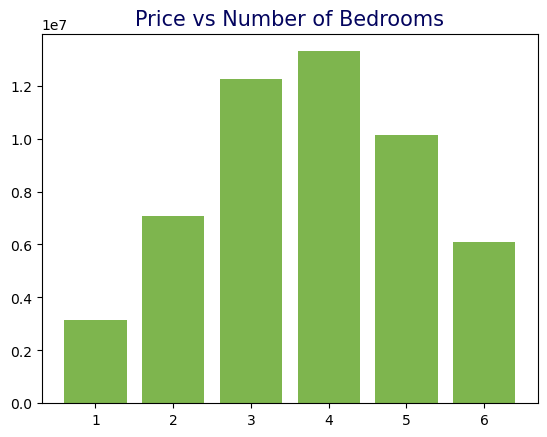

In [8]:
plt.bar(df['bedrooms'], df['price'], color='#7eb54e')
plt.title('Price vs Number of Bedrooms', fontsize=15, color="#03045e")
plt.show()

- Showning correlation to check Multicollinearity

In [9]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot=True)
# it's known that R&D and Marketting spend are multicolon therefore that feature need to be taken down or dropped

<AxesSubplot:>

- It appeared that area and bedroom coeeficient > 0.5 compared to the y (price) 

# Categorical (ordinal) data 

- furnishing status is categorical data

In [10]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [11]:
df['furnishingstatus'].value_counts().plot(kind='bar', color="#03045e")
plt.title('Furnishing Status')

Text(0.5, 1.0, 'Furnishing Status')

# Feature Engineering

- One Hot Encoding for Categorical Data 

In [12]:
#furnishingstatus
furnish_enc  = pd.get_dummies(df['furnishingstatus'], prefix = 'furnishingstatus', drop_first = False)
df = df.drop(['furnishingstatus'], axis = 1)
df = pd.concat([df, furnish_enc], axis=1)

In [13]:
#mainroad
mainroad_enc=pd.get_dummies(df['mainroad'], prefix = 'mainroad', drop_first = False)
df = df.drop(['mainroad'], axis = 1)
df = pd.concat([df, mainroad_enc], axis=1)

In [14]:
#guestroom
guestroom_enc=pd.get_dummies(df['guestroom'], prefix = 'guestroom', drop_first = False)
df = df.drop(['guestroom'], axis = 1)
df = pd.concat([df, guestroom_enc], axis=1)

In [15]:
#basement
basement_enc=pd.get_dummies(df['basement'], prefix = 'basement', drop_first = False)
df = df.drop(['basement'], axis = 1)
df = pd.concat([df, basement_enc], axis=1)

In [16]:
#hotwaterheating
hotwaterheating_enc=pd.get_dummies(df['hotwaterheating'], prefix = 'hotwaterheating', drop_first = False)
df = df.drop(['hotwaterheating'], axis = 1)
df = pd.concat([df, hotwaterheating_enc], axis=1)

In [17]:
#airconditioning
airconditioning_enc=pd.get_dummies(df['airconditioning'], prefix = 'airconditioning', drop_first = False)
df = df.drop(['airconditioning'], axis = 1)
df = pd.concat([df, airconditioning_enc], axis=1)

In [18]:
#prefarea
prefarea_enc=pd.get_dummies(df['prefarea'], prefix = 'prefarea', drop_first = False)
df = df.drop(['prefarea'], axis = 1)
df = pd.concat([df, prefarea_enc], axis=1)

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_no,...,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,1,0,0,0,...,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,1,0,0,0,...,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,1,0,0,0,...,0,1,0,1,1,0,0,1,1,0


Using min max scaler 

In [20]:
scaler = MinMaxScaler()

In [21]:
df[['bedrooms']] = scaler.fit_transform(df[['bedrooms']])

In [22]:
df[['area']] = scaler.fit_transform(df[['area']])

In [23]:
df[['stories']] = scaler.fit_transform(df[['stories']])

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_no,...,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,0.396564,0.6,2,0.666667,2,1,0,0,0,...,1,0,1,0,1,0,0,1,0,1
1,12250000,0.502405,0.6,4,1.000000,3,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0
2,12250000,0.571134,0.4,2,0.333333,2,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
3,12215000,0.402062,0.6,2,0.333333,3,1,0,0,0,...,1,0,0,1,1,0,0,1,0,1
4,11410000,0.396564,0.6,1,0.333333,2,1,0,0,0,...,0,1,0,1,1,0,0,1,1,0


# Preprocessing Modelling

- FEATURE SELECTION
Dropping features which causing multicollinearity based on the preceeding heatmap 

In [25]:
# Dropping multicollinear feature
df.drop(['bathrooms'], axis=1, inplace = True)

In [26]:
#FEATURE IMPORTANCE

In [27]:
X = df.drop(['price'], axis=1)
y = df['price']

In [28]:
#Showing current state of trained data
X

,area,bedrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.396564,0.6,0.666667,2,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1
1,0.502405,0.6,1.000000,3,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0
2,0.571134,0.4,0.333333,2,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1
3,0.402062,0.6,0.333333,3,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1
4,0.396564,0.6,0.333333,2,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,2,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0
541,0.051546,0.4,0.000000,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
542,0.135395,0.2,0.000000,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
543,0.086598,0.4,0.000000,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0


In [29]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

- Splitting Training and Test Set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Modelling 1 (no feature dropped )

In [31]:
model = LinearRegression()

In [32]:
#FIT THE MODEL
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([4734976., 6438912., 3047424., 4947968., 3383296., 3661824.,
       5996544., 5718016., 2686976., 2719744., 8290304., 2662400.,
       3112960., 3801088., 4005888., 3317760., 3055616., 5128192.,
       4784128., 3571712., 6144000., 6127616., 2588672., 4972544.,
       5808128., 6995968., 3219456., 4448256., 8765440., 3407872.,
       5668864., 3538944., 6094848., 4538368., 3956736., 5128192.,
       5365760., 4882432., 3309568., 3883008., 4931584., 3407872.,
       6422528., 4276224., 3768320., 4292608., 6291456., 4562944.,
       3751936., 3514368., 6897664., 2703360., 4415488., 5013504.,
       4177920., 2777088., 6881280., 3063808., 4759552., 2629632.,
       3923968., 2662400., 5373952., 4292608., 4890624., 5095424.,
       6447104., 3743744., 6856704., 6504448., 3850240., 5488640.,
       4579328., 7225344., 3457024., 4915200., 4325376., 4554752.,
       5046272., 4259840., 7241728., 4440064., 5619712., 5734400.,
       2875392., 5070848., 2629632., 3989504., 7520256., 67338

In [35]:
result1 = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result1

,Actual,Predict
316,4060000,4734976.0
77,6650000,6438912.0
360,3710000,3047424.0
90,6440000,4947968.0
493,2800000,3383296.0
...,...,...
15,9100000,5734400.0
357,3773000,4931584.0
39,7910000,6848512.0
54,7350000,5750784.0


In [36]:
MAPE1 = mean_absolute_percentage_error(y_test, y_pred)

In [37]:
MAPE1

0.2074530339688322

# Modelling 2 

In [38]:
X

,area,bedrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.396564,0.6,0.666667,2,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1
1,0.502405,0.6,1.000000,3,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0
2,0.571134,0.4,0.333333,2,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1
3,0.402062,0.6,0.333333,3,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1
4,0.396564,0.6,0.333333,2,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,2,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0
541,0.051546,0.4,0.000000,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
542,0.135395,0.2,0.000000,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
543,0.086598,0.4,0.000000,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0


In [39]:
#GET IMPORTANCE
importance = model.coef_

- Showing The Feature Importance Value, if any value is negative we should drop it
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. (Machine Learning Mastery)

In [40]:
#SUMMARIZE FEATURE IMPORTANCE
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' %(i,v))

Feature: 0, Score: 3844962.78062
Feature: 1, Score: 1319202.63782
Feature: 2, Score: 1628136.31298
Feature: 3, Score: 286606.04420
Feature: 4, Score: -54973630783290228736.00000
Feature: 5, Score: -54973630783290318848.00000
Feature: 6, Score: -54973630783290679296.00000
Feature: 7, Score: 25891233583559581696.00000
Feature: 8, Score: 25891233583559909376.00000
Feature: 9, Score: 3794986471267385344.00000
Feature: 10, Score: 3794986471267639296.00000
Feature: 11, Score: -10251533273790298112.00000
Feature: 12, Score: -10251533273789773824.00000
Feature: 13, Score: 5958604641952806912.00000
Feature: 14, Score: 5958604641953549312.00000
Feature: 15, Score: 3051905270820823552.00000
Feature: 16, Score: 3051905270821656064.00000
Feature: 17, Score: 93924301853588963328.00000
Feature: 18, Score: 93924301853589438464.00000


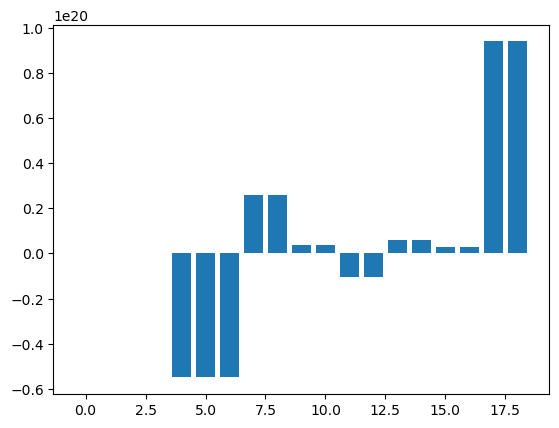

In [53]:
#PLOT FEATURE IMPORTANCE
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- dropping unimportant feature, we choose feature 11 (basement_no)

In [42]:
X.drop(['basement_no'], axis = 1, inplace=True)

In [43]:
X

,area,bedrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.396564,0.6,0.666667,2,1,0,0,0,1,1,0,0,1,0,0,1,0,1
1,0.502405,0.6,1.000000,3,1,0,0,0,1,1,0,0,1,0,0,1,1,0
2,0.571134,0.4,0.333333,2,0,1,0,0,1,1,0,1,1,0,1,0,0,1
3,0.402062,0.6,0.333333,3,1,0,0,0,1,1,0,1,1,0,0,1,0,1
4,0.396564,0.6,0.333333,2,1,0,0,0,1,0,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,2,0,0,1,0,1,1,0,1,1,0,1,0,1,0
541,0.051546,0.4,0.000000,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0
542,0.135395,0.2,0.000000,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0
543,0.086598,0.4,0.000000,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0


- Splitting Training and Test Set

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Multiple Linear Regression

In [45]:
#MODEL
model2 = LinearRegression()

In [46]:
# Fitting model to the trained data
model2.fit(X_train, y_train)

LinearRegression()

In [47]:
#PREDICT THE RESULT
y_pred = model2.predict(X_test)

In [48]:
result2 = pd.DataFrame({'Actual': y_test, 
                        'Prediction': y_pred})
result2

,Actual,Prediction
316,4060000,4608000.0
77,6650000,6520832.0
360,3710000,3084288.0
90,6440000,4960256.0
493,2800000,3411968.0
...,...,...
15,9100000,5672960.0
357,3773000,4919296.0
39,7910000,6811648.0
54,7350000,5730304.0


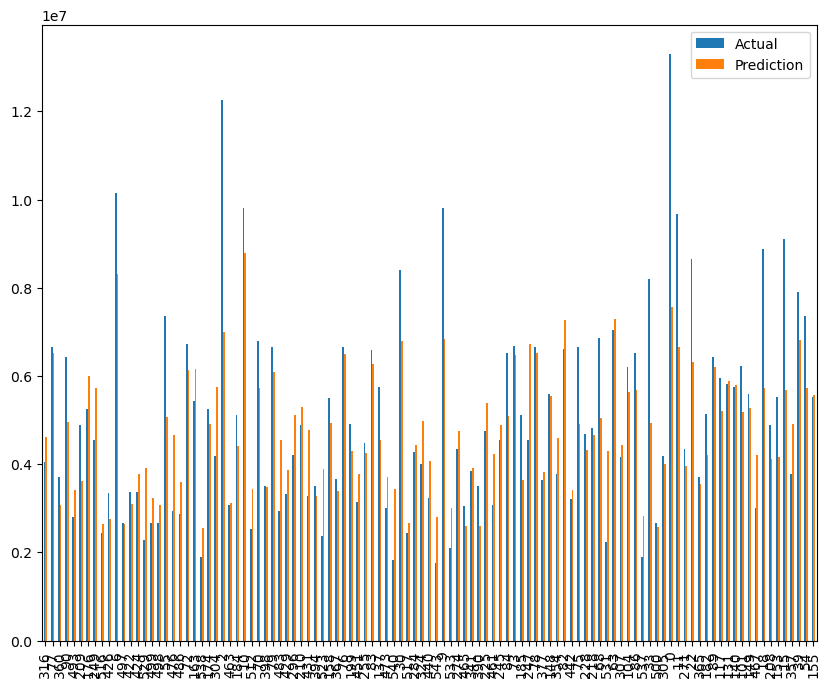

In [49]:
#PLOT THE RESULT
result2.plot(kind ='bar', figsize=(10,8))
plt.show()

# EVALUATE MODEL

- Showing its MAPE (mean absolute percentage error)

In [50]:
MAPE2 = mean_absolute_percentage_error(y_test, y_pred)

In [51]:
#New MAPE
MAPE2

0.20425522572057536

In [52]:
#Compare to MAPE1
MAPE1

0.2074530339688322